# Xtream AI assignement - Challenge 1 
# Data Exploration and Cleaning of diamond.csv dataset

## Purpose

'Discover the why behind every price tag.'

In this notebook I perform inital data exploration and I simultaneously process and clean the data while uncovering new insights. 

The processed data is saved in a .csv and then given in input to the Training.ipynb notebook.

## Previous works

#### Extracted informations from [GEMO](https://www.researchgate.net/publication/375647223_Gemo_An_AI-Powered_Approach_to_Color_Clarity_Cut_Prediction_and_Valuation_for_Gemstones):

"Value and beauty of gemstones depend heavily on the precision and quality of their cuts."
"...type of gemstone and considers various characteristics such as kind, color scheme, form, and weight to estimate its value"
"...The valuation of gemstones depends on multiple factors,
including color, cut, carat weight, and clarity..."

- Regression with Random Forest to predict the price
- train-test % split:  80-20
- Metric: RMSE, used to determine the degree of variation between expected and observed prices
- Shape and weight are factors to keep under observation.

#### Extracted informations from [AEMLA](https://ieeexplore.ieee.org/document/10080618):

-  Metrics: R2score, Low RMSE, MAE values, CV Score
- Linear Regression, Random Forest, Decision Tree Random Forest, Cat-Boost Regressor and XGB Regressor.  
- Faceted diamonds are evaluated based on their color, cut, clarity, and carat weight to assess their overall quality
- The two most important aspects of a product are its weight and its color

## Dataset Description

In this section, I have summarized some additional research and responded to questions that have arisen from the data I received.

| Feature       | Description                                      |
|-------------|--------------------------------------------------|
| carat       | Weight of the diamond (1 carat = 200mg)          |
| cut         | Cut quality (to maximize light performance ~ sparkle) |
| color       | [GIA](https://www.gia.edu/gia-about/4cs-color) Color grade                                   |
| clarity     | Clarity grade                                    |
| depth       | The z-depth of the diamond (as a percentage of z)|
| table       | The table-width of the diamond's top (as a percentage of x) |
| price       | Diamonds price (probably in USD as in [stonealgo](https://www.stonealgo.com/diamond-prices/))                                  |
| x           | Width  (in mm / if round, is the diameter)       |
| y           | Length  (in mm)                                  |
| z           | Depth   (in mm)                                  |

#### Color scale values meaning:
From D(Colorless - HIGH GRADE) to Z(Light Yellow - LOWER GRADE).

'Yellow diamonds are usually more expensive than white diamonds because they're harder to find and more difficult to mine.
There is less demand for yellow diamonds than white ones -> lower production, low quantities'
[lndgold](https://www.londongold.com/education/yellow-diamonds-vs-white-diamonds/#:~:text=If%20you're%20trying%20to,than%20other%20fancy%20colored%20diamonds).

'The most highly valued diamonds have no color. More color a stone has (yellow or brown), the lower the grade.
Yellow or brown diamonds that make it past the Z grade, however, instantly go up in price. 
Such diamonds have enough color to be considered "fancy," along with pink, green, and blue diamonds.'
[gemosoc](https://www.gemsociety.org/article/diamond-color/)

#### Clarity scale values meaning:
If they have visible imperfections that could reduce their value or make them less appealing:

- FL - Flawless
- VVS1 - Very, very slightly included, first degree
- VVS2 - Very, very slightly included, second degree
- VS1 - Very slightly included, first degree
- VS2 - Very slightly included, second degree
- SI1 - Slightly included, first degree
- SI2 - Slightly included, second degree.
- I1 - Included Diamonds, first degree.

Typical diamonds dimension range : [4 mm, 11 mm].

Since depth is derived from the z and z-depth dimensions, and table is derived from table-width and x, they might not provide additional unique information beyond what is already captured by the original dimensions (Keep an eye on this).

## Library import


In [1]:
#!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset Exploration

In [2]:
diamonds_df=pd.read_csv('../datasets/diamonds/diamonds.csv')
print(diamonds_df)
print(diamonds_df.describe())

      carat        cut color clarity  depth  table  price     x     y     z
0      1.10      Ideal     H     SI2   62.0   55.0   4733  6.61  6.65  4.11
1      1.29      Ideal     H     SI1   62.6   56.0   6424  6.96  6.93  4.35
2      1.20    Premium     I     SI1   61.1   58.0   5510  6.88  6.80  4.18
3      1.50      Ideal     F     SI1   60.9   56.0   8770  7.43  7.36  4.50
4      0.90  Very Good     F     VS2   61.7   57.0   4493  6.17  6.21  3.82
...     ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
4995   0.38      Ideal     H    VVS2   62.3   53.3    832  4.65  4.69  2.91
4996   0.33    Premium     G    VVS2   61.3   59.0    927  4.45  4.42  2.72
4997   1.25      Ideal     J    VVS2   62.1   56.0   5980  6.81  6.84  4.24
4998   0.31    Premium     F     VS2   62.9   58.0    802  4.31  4.27  2.70
4999   0.30      Ideal     H    VVS1   61.2   57.0    655  4.30  4.39  2.66

[5000 rows x 10 columns]
             carat        depth        table        price     

What is visible here is that some 'x''y''z' dimensions are = '0' and some 'prices' reach '-1' values.

I might need to remove 0 values for the dimensions and the negative values for the prices since those are nonsensical.

What could be the reasons for negative and null values?
1) If the diamond is round, the y dimension might be null.
2) negative price? Cannot think of a logical reason, maybe a template value for a price that never came.

In [3]:
# Divide numerical features from categorical ones
numerical_features = diamonds_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = diamonds_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Numerical_features: ',numerical_features,'\nCategorical features: ',categorical_features)

Numerical_features:  ['carat', 'depth', 'table', 'price', 'x', 'y', 'z'] 
Categorical features:  ['cut', 'color', 'clarity']


## Numerical features overview

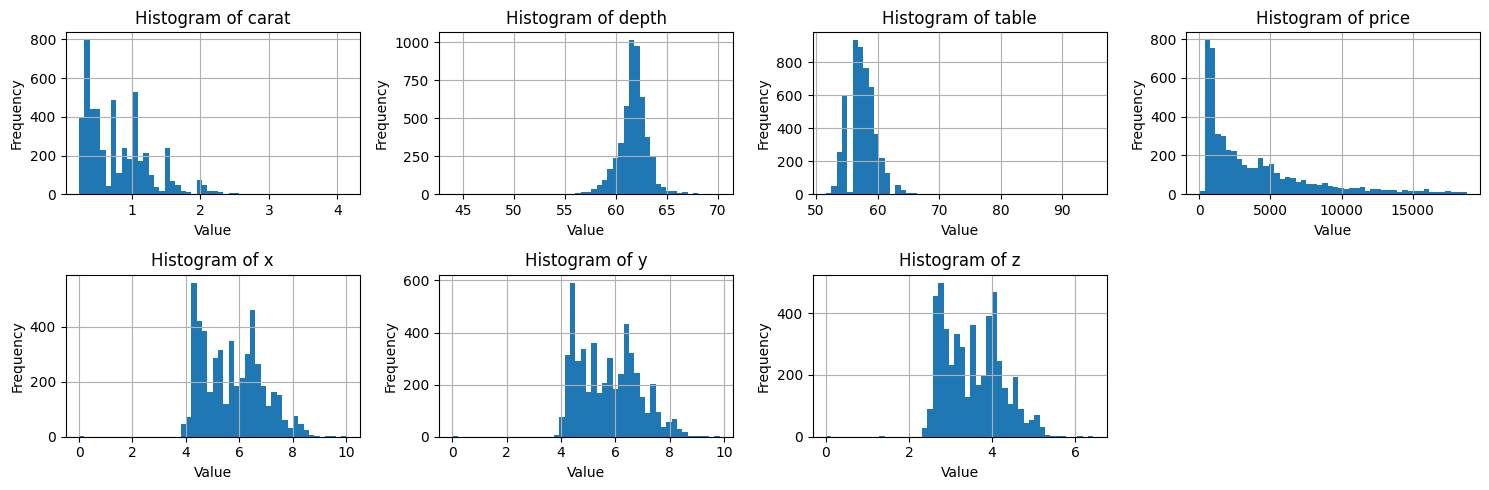

In [4]:
# Histograms for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i +1)
    diamonds_df[feature].plot(kind='hist', title=f'Histogram of {feature}', bins=50)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

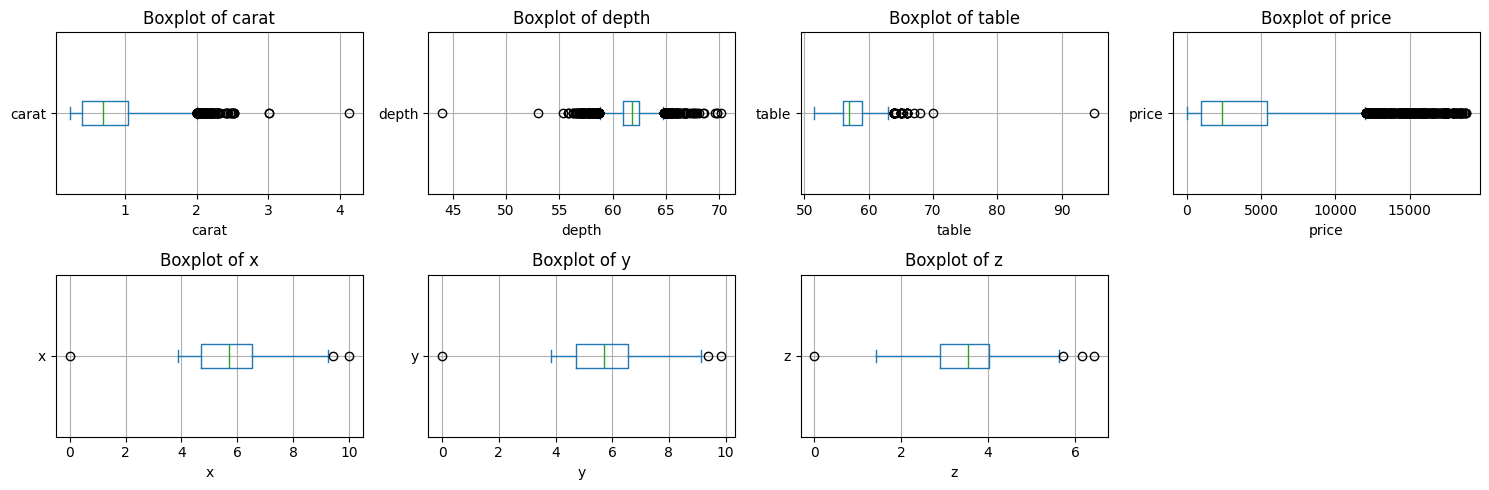

In [5]:
#boxplot for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i +1)
    diamonds_df[feature].plot(kind='box', title=f'Boxplot of {feature}', vert=False)
    plt.xlabel(feature)
    plt.grid(True)
plt.tight_layout()
plt.show()

#add outliers count from the boxplots

We can see that dimensional features follow a normal distribution.
Carat, price, depth and table are skewed and present more outliers

It appears that there are very few rows with x, y, or z features equal to 0.

In [6]:
# Count rows where 'x' and 'y' are equal to 0
count_zero_x = len(diamonds_df[(diamonds_df['x'] == 0) ])
count_zero_y = len(diamonds_df[(diamonds_df['y'] == 0) ])
count_zero_z = len(diamonds_df[(diamonds_df['z'] == 0) ])
print(count_zero_x, count_zero_y,count_zero_z)

# Select rows with values equal to 0
null_df= diamonds_df[(diamonds_df == 0).any(axis=1)]
null_df

1 1 1


,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


The intuition about the diamonds being round is not verified: as there is only one entry with 'x', 'y', and 'z' values equal to 0.

It is possible to remove it since it will not significantly affect the overall dataset distribution.

# Dataset Cleaning
### NULL values

In [7]:
#Check null values
diamonds_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### 0 values

In [8]:
#Delete rows with values =0
clean_diamonds_df = diamonds_df[~(diamonds_df == 0).any(axis=1)]
len(clean_diamonds_df)

4999

### Duplicates
Remove the duplicate entries if exist.

In [9]:
duplicates = clean_diamonds_df[clean_diamonds_df.duplicated()]

clean_diamonds_df = clean_diamonds_df.drop_duplicates()
print(duplicates,'\n', clean_diamonds_df)

      carat      cut color clarity  depth  table  price     x     y     z
4943   0.31  Premium     E     VS2   61.6   59.0    872  4.35  4.32  2.67 
       carat        cut color clarity  depth  table  price     x     y     z
0      1.10      Ideal     H     SI2   62.0   55.0   4733  6.61  6.65  4.11
1      1.29      Ideal     H     SI1   62.6   56.0   6424  6.96  6.93  4.35
2      1.20    Premium     I     SI1   61.1   58.0   5510  6.88  6.80  4.18
3      1.50      Ideal     F     SI1   60.9   56.0   8770  7.43  7.36  4.50
4      0.90  Very Good     F     VS2   61.7   57.0   4493  6.17  6.21  3.82
...     ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
4995   0.38      Ideal     H    VVS2   62.3   53.3    832  4.65  4.69  2.91
4996   0.33    Premium     G    VVS2   61.3   59.0    927  4.45  4.42  2.72
4997   1.25      Ideal     J    VVS2   62.1   56.0   5980  6.81  6.84  4.24
4998   0.31    Premium     F     VS2   62.9   58.0    802  4.31  4.27  2.70
4999   0.30   

### Negative prices

In [10]:
# Check negative price rows
neg_price = clean_diamonds_df[clean_diamonds_df['price'] <= 0]
neg_price

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [11]:
clean_diamonds_df = clean_diamonds_df.drop(neg_price.index)
len(clean_diamonds_df)

4988

## Categorical Features overview

 Categorial features countplots are shown below.

 Since the categorical features are all ordered, I apply the label encoding technique to transform the categorical values to ordered numerical ones.

 I assign lower quality to lower values.

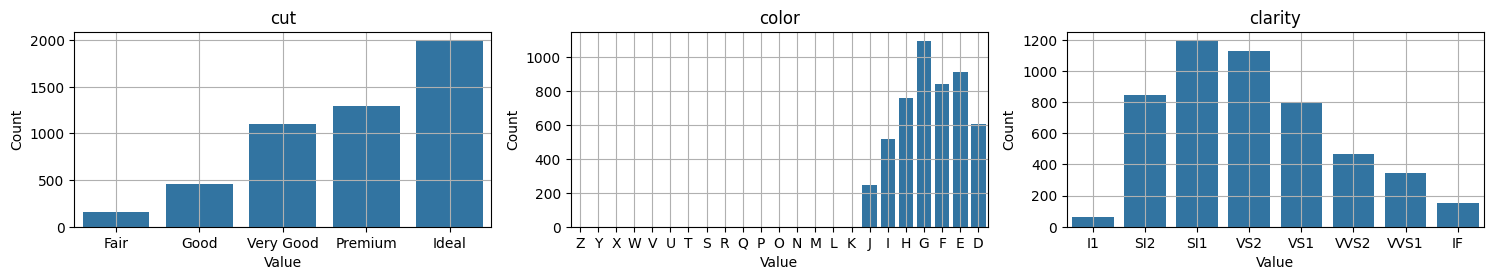

In [12]:
# Countplot for categorical features
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = reversed([chr(i) for i in range(ord('D'), ord('Z')+1)])
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1','IF']

clean_diamonds_df['cut'] = pd.Categorical(clean_diamonds_df['cut'], categories=cut_order, ordered=True)
clean_diamonds_df['color'] = pd.Categorical(clean_diamonds_df['color'], categories=color_order, ordered=True)
clean_diamonds_df['clarity'] = pd.Categorical(clean_diamonds_df['clarity'], categories=clarity_order, ordered=True)

plt.figure(figsize=(20, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=clean_diamonds_df, x=feature)
    plt.title(f'{feature}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
#Compute percentage of 'Ideal' class in 'cut' feature
filtered_data = clean_diamonds_df[clean_diamonds_df['cut'] == 'Ideal']
len(filtered_data)/len(clean_diamonds_df)

0.3983560545308741

For the 'cut' feature the Ideal class occupies the 40% of the data

For the 'color' feature the most frequent class is G (Near Colorless), confirms that yellowish stones are less requested/easy to extract.

For the 'clarity' feature the most frequent classes are VS2 - Very slightly included, second degree and SI1 - Slightly included, first degree.


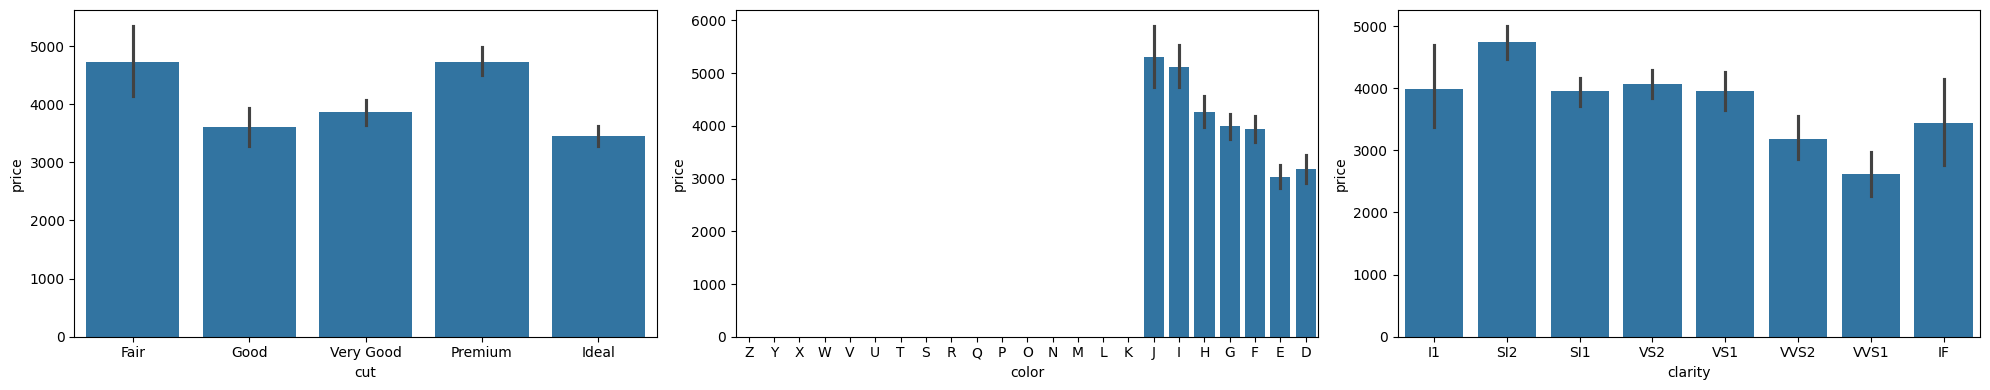

In [14]:
# Barplots for categorical feature against price
plt.figure(figsize=(20, 4))
for i,feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=feature, y='price', data=clean_diamonds_df)
plt.tight_layout()
plt.show()

All the categorical features classes are quite evenly distributed against the price apart from the color feature, which only present a part of the possible values.
The models will not learn information about absent classes.

PREZZO MEDIO?

Apply the encoding of the categorical features to the dataframe

In [15]:
clean_diamonds_df['cut_enc'] = clean_diamonds_df['cut'].cat.codes
clean_diamonds_df['color_enc'] = clean_diamonds_df['color'].cat.codes
clean_diamonds_df['clarity_enc'] = clean_diamonds_df['clarity'].cat.codes
clean_diamonds_df=clean_diamonds_df.drop(['cut', 'color', 'clarity'],axis=1)
clean_diamonds_df


,carat,depth,table,price,x,y,z,cut_enc,color_enc,clarity_enc
0,1.10,62.0,55.0,4733,6.61,6.65,4.11,4,18,1
1,1.29,62.6,56.0,6424,6.96,6.93,4.35,4,18,2
2,1.20,61.1,58.0,5510,6.88,6.80,4.18,3,17,2
3,1.50,60.9,56.0,8770,7.43,7.36,4.50,4,20,2
4,0.90,61.7,57.0,4493,6.17,6.21,3.82,2,20,3
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,62.3,53.3,832,4.65,4.69,2.91,4,18,5
4996,0.33,61.3,59.0,927,4.45,4.42,2.72,3,19,5
4997,1.25,62.1,56.0,5980,6.81,6.84,4.24,4,16,5
4998,0.31,62.9,58.0,802,4.31,4.27,2.70,3,20,3


## Scatterplots and correlation

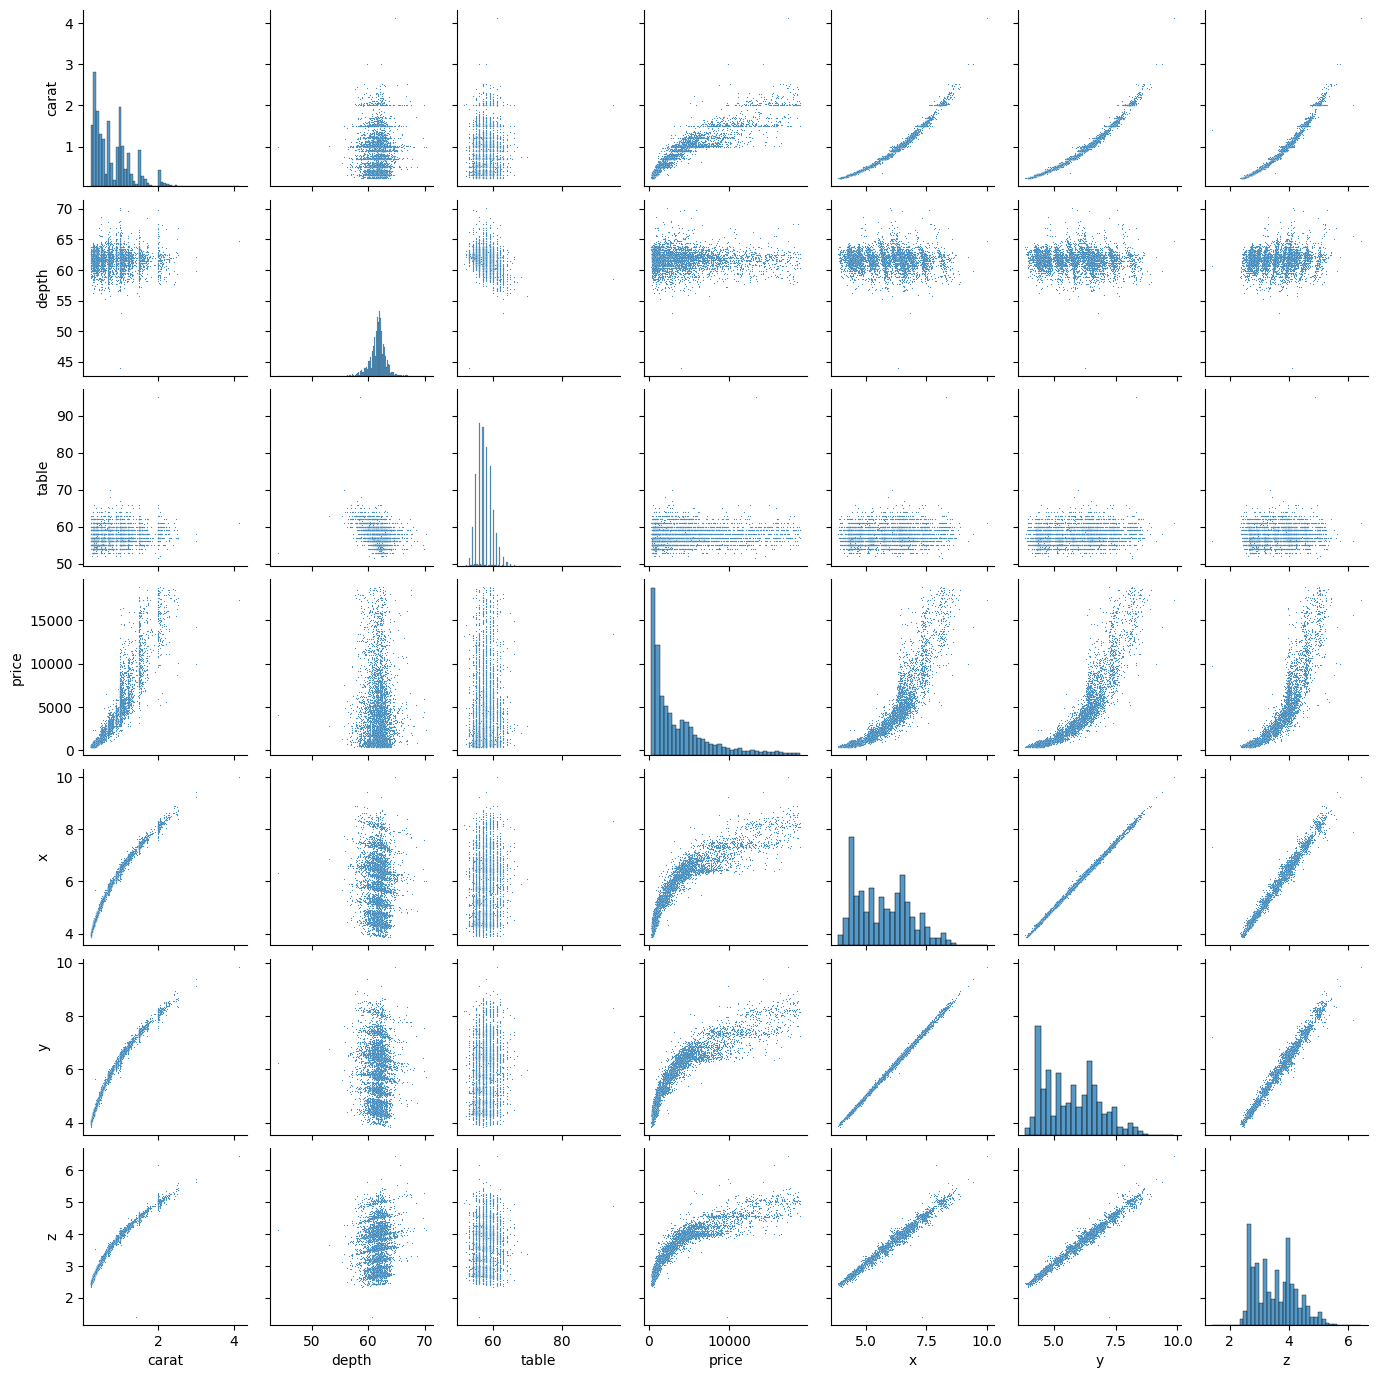

In [16]:
numerical_df =clean_diamonds_df[numerical_features]
marker_size = 0.7
sns.pairplot(numerical_df, plot_kws={'s': marker_size} , height=2)
plt.show()

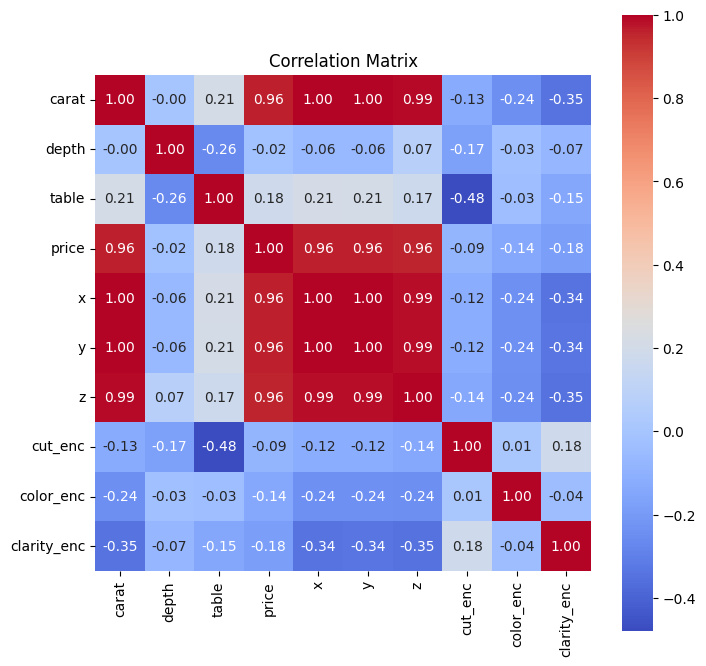

In [17]:
#Correlation matrix
correlation_matrix = clean_diamonds_df.corr(method='spearman')

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In the plot above, the correlation between features is shown.
I use Spearman's matrix because is less sensitive to outliers and skewed distributions.

Correlation values above 0.8 are considered as an index of strong positive correlation between two variables.

I observe that:
- Carat is strongly positively correlated to x,y,z, dimensions. It makes sense since the carat represent the weight of the diamond, bigger dimension implies higher weight (with same density).
- Dimensions are strongly correlated each other.
- Price is strongly correlated to carat.
- Is curios that table and depth are not strongly correlated to x and z.

In conclusion x,y,z, can be removed from the dataset  OR TWO OF THE 3 VARIABLES

to do

not visible correlation with this features
commenta il fatto che le categorical features in realtà sono ben distribuite su tutte le fasce di prezzo. The price exhibits relatively minor variations across the categorical features.
Regarding categorical features, such as cut, color and clarity, one can make boxplots to see the distribution of prices and based on that recognize the presence of a trend.



In [18]:
# Remove x,y,z,
reduced_diamonds_df = clean_diamonds_df.drop(['x', 'y', 'z'], axis=1)

## Price vs Carat

At some point, the strong correlation between carat and price is lost, after 2.5, the carat dimension is dispersed, we can see outliers

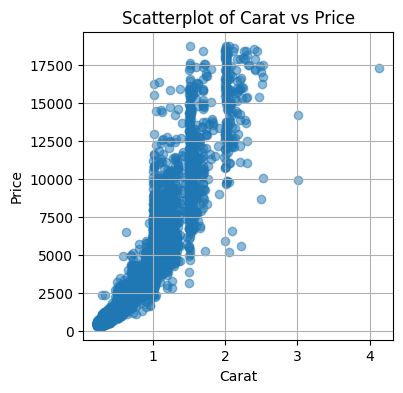

In [19]:
plt.figure(figsize=(4,4))
plt.scatter(reduced_diamonds_df['carat'], reduced_diamonds_df['price'], alpha=0.5)
plt.title('Scatterplot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Outliers removal
Remove the outliers from the dataset using interquartile Range(IQR)

In [20]:
reduced_diamonds_df

,carat,depth,table,price,cut_enc,color_enc,clarity_enc
0,1.10,62.0,55.0,4733,4,18,1
1,1.29,62.6,56.0,6424,4,18,2
2,1.20,61.1,58.0,5510,3,17,2
3,1.50,60.9,56.0,8770,4,20,2
4,0.90,61.7,57.0,4493,2,20,3
...,...,...,...,...,...,...,...
4995,0.38,62.3,53.3,832,4,18,5
4996,0.33,61.3,59.0,927,3,19,5
4997,1.25,62.1,56.0,5980,4,16,5
4998,0.31,62.9,58.0,802,3,20,3


In [21]:
 # Calculate Q1, Q3, and IQR for each feature  FALLO SOLO PER NUMERICAL

Q1 = reduced_diamonds_df.quantile(0.25)
Q3 = reduced_diamonds_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper limits for each feature
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = reduced_diamonds_df[~((reduced_diamonds_df < lower_limit).any(axis=1) | (reduced_diamonds_df > upper_limit).any(axis=1))]

print(df_no_outliers)

      carat  depth  table  price  cut_enc  color_enc  clarity_enc
0      1.10   62.0   55.0   4733        4         18            1
1      1.29   62.6   56.0   6424        4         18            2
2      1.20   61.1   58.0   5510        3         17            2
3      1.50   60.9   56.0   8770        4         20            2
4      0.90   61.7   57.0   4493        2         20            3
...     ...    ...    ...    ...      ...        ...          ...
4995   0.38   62.3   53.3    832        4         18            5
4996   0.33   61.3   59.0    927        3         19            5
4997   1.25   62.1   56.0   5980        4         16            5
4998   0.31   62.9   58.0    802        3         20            3
4999   0.30   61.2   57.0    655        4         18            6

[4412 rows x 7 columns]


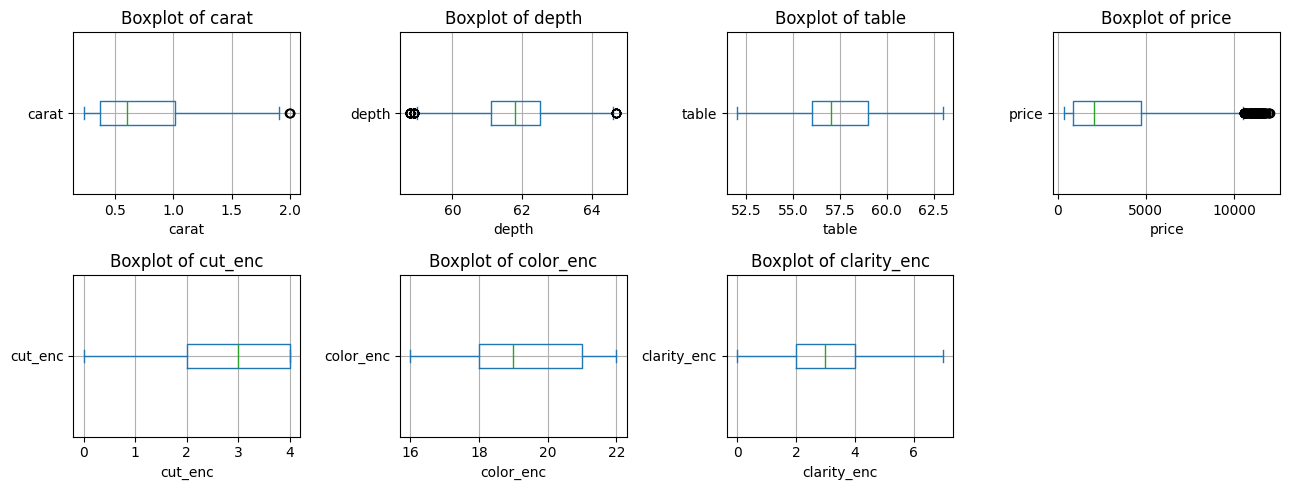

In [22]:
#boxplot for numerical features again
plt.figure(figsize=(13, 5))
for i, feature in enumerate(df_no_outliers):
    plt.subplot(2, 4, i +1)
    df_no_outliers[feature].plot(kind='box', title=f'Boxplot of {feature}', vert=False)
    plt.xlabel(feature)
    plt.grid(True)
plt.tight_layout()
plt.show()

#add outliers count from the boxplots

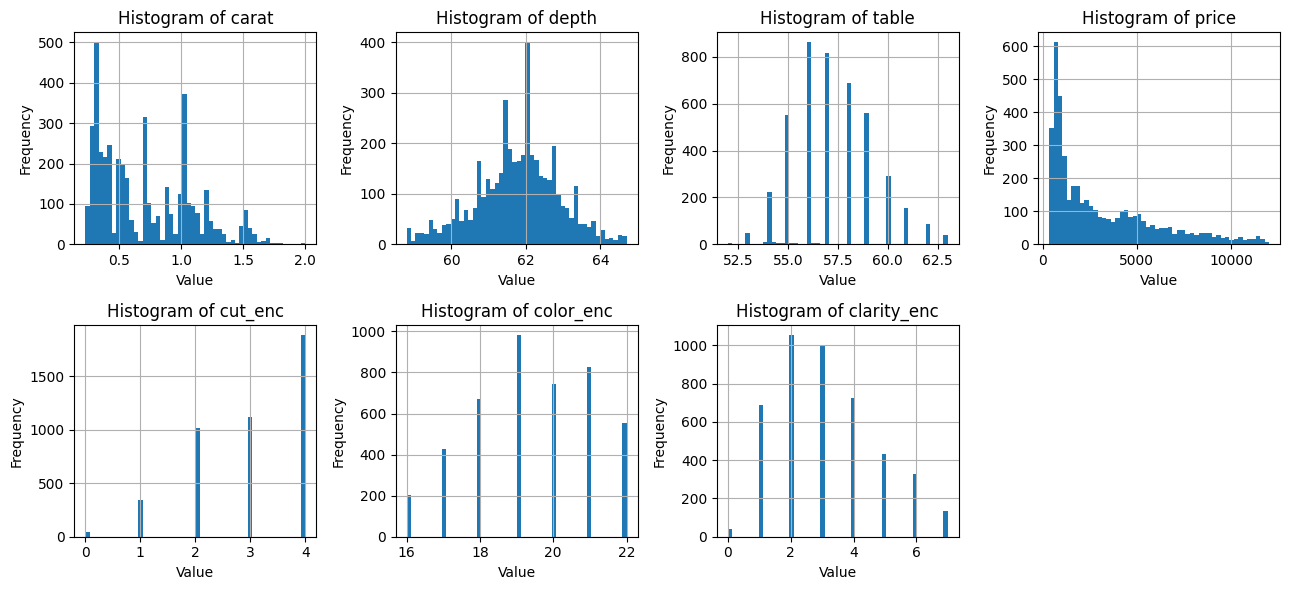

In [23]:
# histograms for numerical features

plt.figure(figsize=(13, 6))
for i, feature in enumerate(df_no_outliers):
    plt.subplot(2, 4, i +1)
    df_no_outliers[feature].plot(kind='hist', title=f'Histogram of {feature}', bins=50)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

Since the price distribution and carat are left skewed I want to make it more normal applin the log function

In [24]:
# Applying a log transformation to the target variable (price) to improve normality
 
df_no_outliers['log_price'] = np.log(df_no_outliers['price'])
df_no_outliers['log_carat'] = np.log(df_no_outliers['carat'])

C:\Users\Matilde\AppData\Local\Temp\ipykernel_82448\4209865474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['log_price'] = np.log(df_no_outliers['price'])
C:\Users\Matilde\AppData\Local\Temp\ipykernel_82448\4209865474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['log_carat'] = np.log(df_no_outliers['carat'])


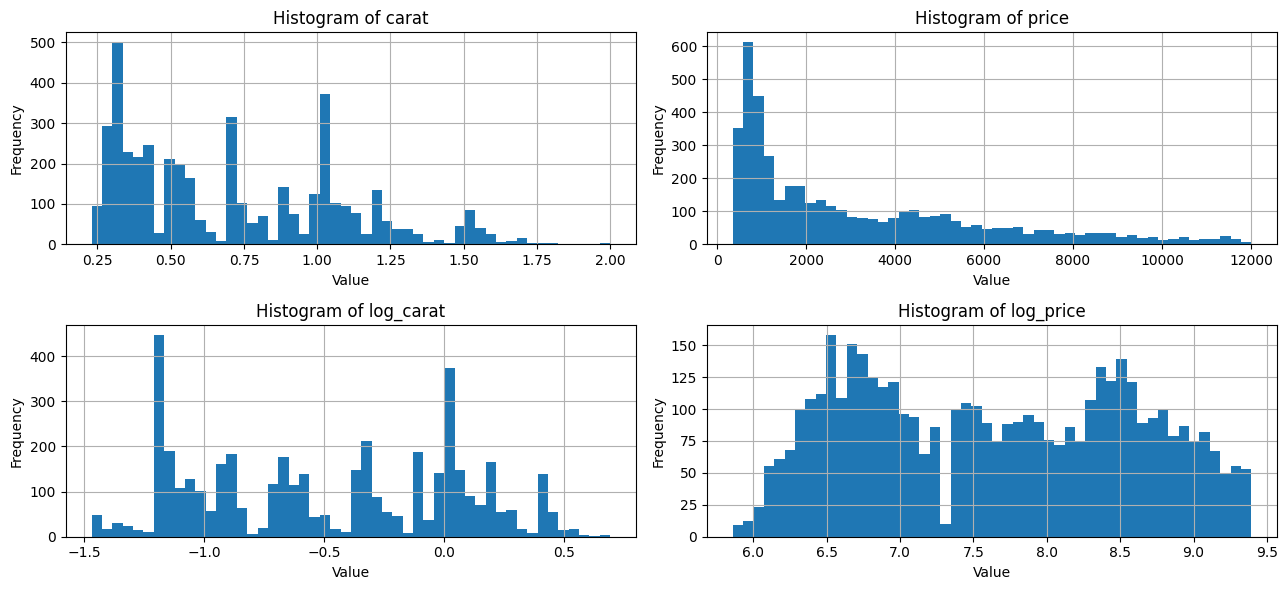

In [25]:
# histograms for numerical features

plt.figure(figsize=(13, 6))
for i, feature in enumerate(['carat','price','log_carat','log_price']):
    plt.subplot(2,2, i +1)
    df_no_outliers[feature].plot(kind='hist', title=f'Histogram of {feature}', bins=50)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Clean and preprocess the data




## Save the data

In [26]:
reduced_diamonds_df.to_csv('../datasets/diamonds/clean_data.csv', index=False)

# References:

[GEMO](https://www.researchgate.net/publication/375647223_Gemo_An_AI-Powered_Approach_to_Color_Clarity_Cut_Prediction_and_Valuation_for_Gemstones) S, Senarathne & Epitawatta, Kanjana & Thennakoon, Kusalani & W, Diunugala & Rathnayake, H. & Madhuhansi, M.. (2023). “Gemo”: An AI-Powered Approach to Color, Clarity, Cut Prediction, and Valuation for Gemstones. International Research Journal of Innovations in Engineering and Technology. 07. 406-416. 10.47001/IRJIET/2023.710054.

[AEMLA](https://ieeexplore.ieee.org/document/10080618) M. S. A. Basha, P. M. Oveis, C. Prabavathi, M. B. Lakshmi and M. M. Sucharitha, "An Efficient Machine Learning Approach: Analysis of Supervised Machine Learning Methods to Forecast the Diamond Price," 2023 International Conference for Advancement in Technology (ICONAT), Goa, India, 2023, pp. 1-6, doi: 10.1109/ICONAT57137.2023.10080618.
2. author2, article2, journal2, year2, url2